In [76]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 $('div.output_prompt').css('opacity', 0);  // do not show output prompt
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [64]:
from altair import X, Y, Axis, Color, Scale
import altair as alt
import pandas as pd

alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [4]:
df = pd.read_clipboard()

In [6]:
df

,MFSS,Model_X,Model_Y
0,1,0.10,0.00
1,2,0.12,0.21
2,3,0.22,0.26
3,4,0.28,0.44
4,5,0.33,0.66
5,6,0.40,0.80
6,7,0.60,1.97
7,8,NaN,2.24
8,9,NaN,2.45


In [33]:
df_long = pd.melt(df, id_vars=['MFSS'], value_name='Defect_Rate', var_name=['Model']).dropna()

In [34]:
df_long

,MFSS,Model,Defect_Rate
0,1,Model_X,0.10
1,2,Model_X,0.12
2,3,Model_X,0.22
3,4,Model_X,0.28
4,5,Model_X,0.33
5,6,Model_X,0.40
6,7,Model_X,0.60
9,1,Model_Y,0.00
10,2,Model_Y,0.21
11,3,Model_Y,0.26


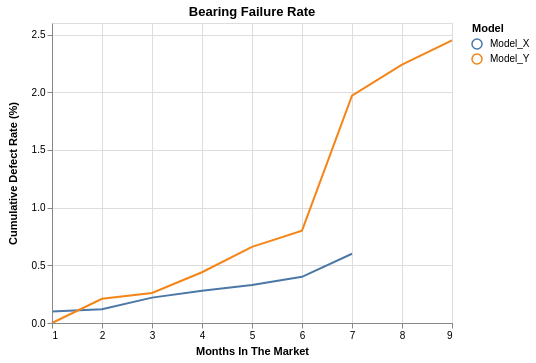

In [35]:
alt.Chart(df_long).mark_line().encode(
    x=X('MFSS:Q', axis=Axis(title='Months In The Market')),
    y=Y('Defect_Rate:Q', axis=Axis(title='Cumulative Defect Rate (%)')),
    color='Model',
    tooltip=['Model', 'MFSS']
).properties(title='Bearing Failure Rate')

In [27]:
by_build_month = pd.read_clipboard(parse_dates=[0])

In [28]:
by_build_month

,Build_Month,Model_X,Model_Y
0,2017-01-01,0.80,0.70
1,2017-02-01,0.75,0.60
2,2017-03-01,0.70,0.55
3,2017-04-01,0.62,0.43
4,2017-05-01,0.40,0.30
5,2017-06-01,0.30,0.20
6,2017-07-01,0.22,NaN


In [32]:
by_build_month['YR_MTH'] = by_build_month['Build_Month'].apply(lambda x: x.strftime('%Y-%m'))
by_build_month

,Build_Month,Model_X,Model_Y,YR_MTH
0,2017-01-01,0.80,0.70,2017-01
1,2017-02-01,0.75,0.60,2017-02
2,2017-03-01,0.70,0.55,2017-03
3,2017-04-01,0.62,0.43,2017-04
4,2017-05-01,0.40,0.30,2017-05
5,2017-06-01,0.30,0.20,2017-06
6,2017-07-01,0.22,NaN,2017-07


In [38]:
by_build_month_long = pd.melt(by_build_month, id_vars=['YR_MTH'], value_vars=['Model_X','Model_Y'], value_name='Defect_Rate', var_name='Model').dropna()

In [39]:
by_build_month_long

,YR_MTH,Model,Defect_Rate
0,2017-01,Model_X,0.80
1,2017-02,Model_X,0.75
2,2017-03,Model_X,0.70
3,2017-04,Model_X,0.62
4,2017-05,Model_X,0.40
5,2017-06,Model_X,0.30
6,2017-07,Model_X,0.22
7,2017-01,Model_Y,0.70
8,2017-02,Model_Y,0.60
9,2017-03,Model_Y,0.55


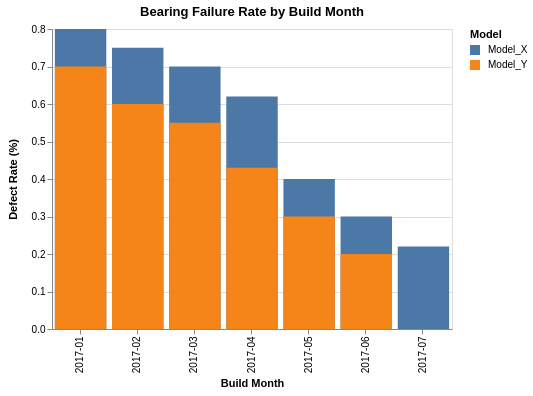

In [75]:
alt.Chart(by_build_month_long).mark_bar().encode(
    x=X('YR_MTH', axis=Axis(title='Build Month')),
    y=Y('Defect_Rate:Q', axis=Axis(title='Defect Rate (%)'), stack=None),
    color=Color('Model:N'),
    tooltip=['Model', 'YR_MTH', 'Defect_Rate'],
).properties(title='Bearing Failure Rate by Build Month', width=400)